<a href="https://colab.research.google.com/github/samiha-mahin/WaterQuality/blob/main/WQ_EnsembleDT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Feature Engineering
df["Solids_per_Hardness"] = df["Solids"] / (df["Hardness"] + 1e-5)
df["pH_Turbidity"] = df["ph"] * df["Turbidity"]
df["Sulfate_Chloramines"] = df["Sulfate"] * df["Chloramines"]

# Split features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=None, n_jobs=-1)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Create Voting Classifier (ensemble of Decision Tree, Random Forest, and Gradient Boosting)
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rf', rf_model),
    ('gb', gb_model)
], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = ensemble_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Ensemble Decision Tree Accuracy:", accuracy)
print("Classification Report:\n", report)


Ensemble Decision Tree Accuracy: 0.6309904153354633
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.70      0.71       394
           1       0.50      0.51      0.51       232

    accuracy                           0.63       626
   macro avg       0.61      0.61      0.61       626
weighted avg       0.63      0.63      0.63       626



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Load dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Feature Engineering (only useful ones)
df["Solids_per_Hardness"] = df["Solids"] / (df["Hardness"] + 1e-5)
df["pH_Turbidity"] = df["ph"] * df["Turbidity"]
df["Sulfate_Chloramines"] = df["Sulfate"] * df["Chloramines"]

# Step 3: Split features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Step 4: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 7: Define base models with better hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# Step 8: Ensemble with soft voting
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model)
], voting='soft')

# Step 9: Train model
ensemble_model.fit(X_resampled, y_resampled)

# Step 10: Predict and evaluate
y_pred = ensemble_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Ensemble Accuracy:", accuracy)
print("📊 Classification Report:\n", report)


✅ Ensemble Accuracy: 0.6677316293929713
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       386
           1       0.57      0.52      0.54       240

    accuracy                           0.67       626
   macro avg       0.65      0.64      0.64       626
weighted avg       0.66      0.67      0.66       626



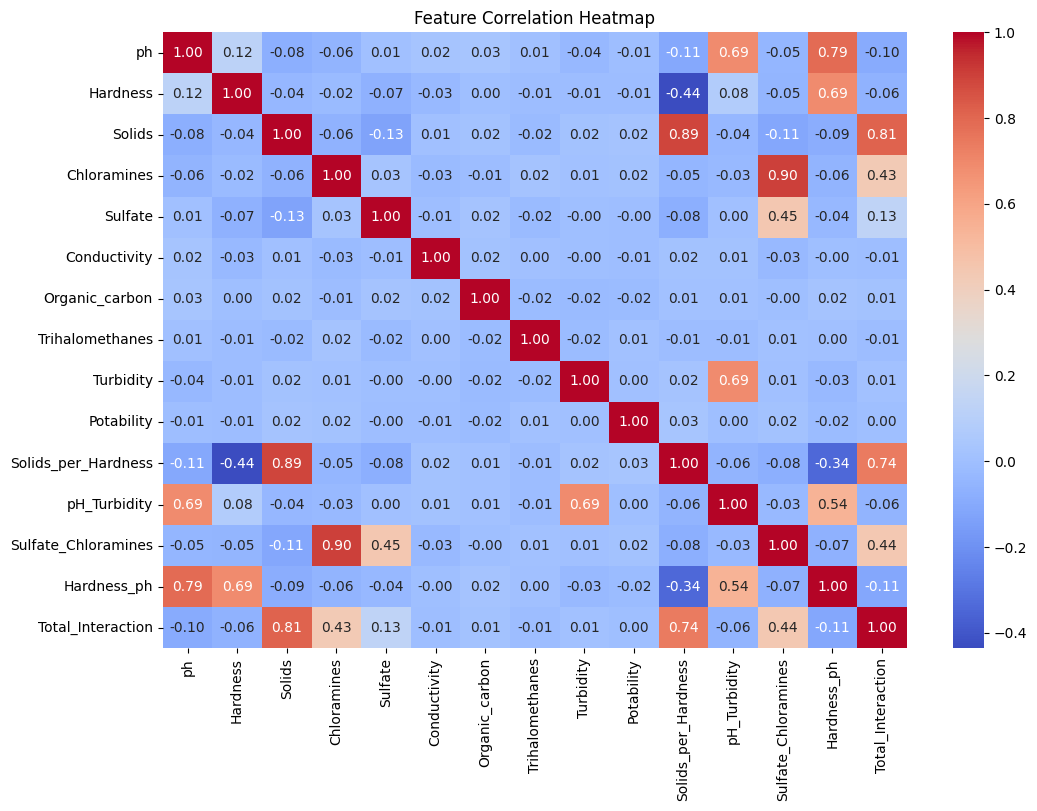

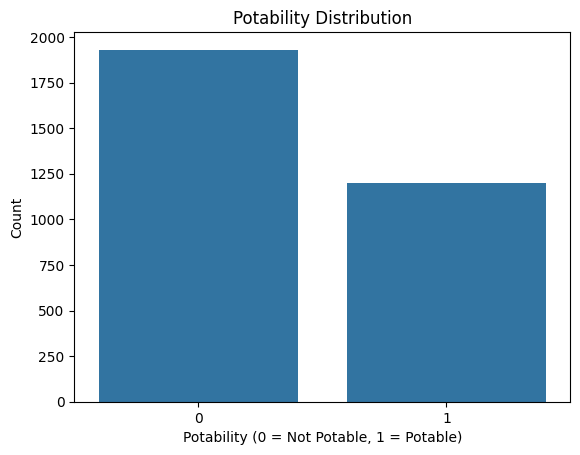

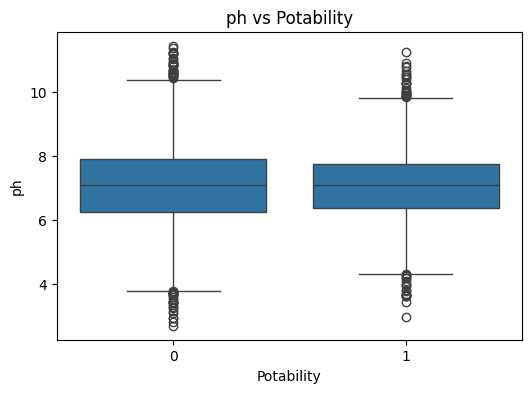

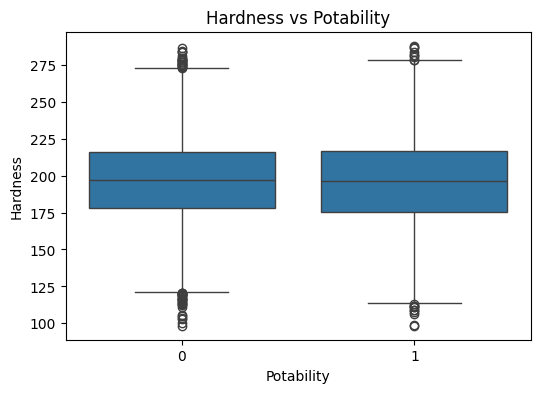

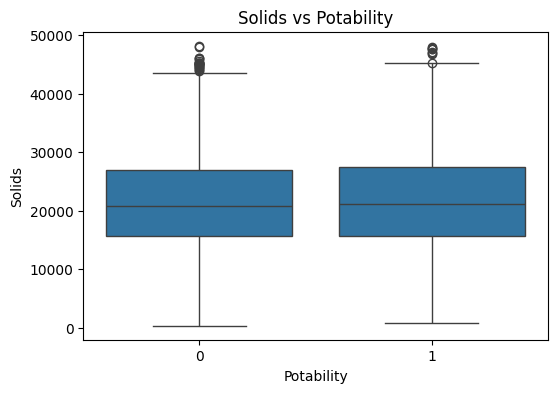

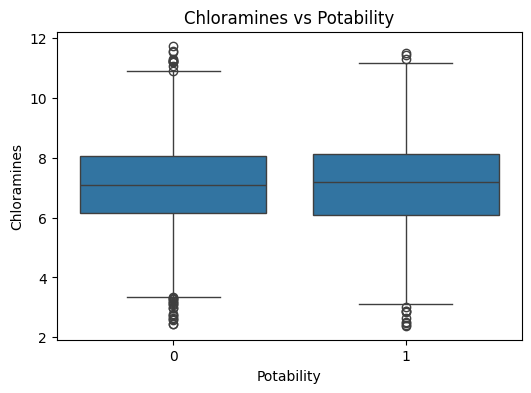

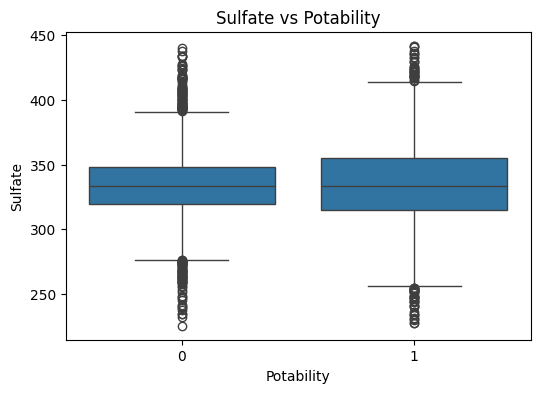

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
sns.countplot(x='Potability', data=df)
plt.title("Potability Distribution")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Potability', y=col, data=df)
    plt.title(f"{col} vs Potability")
    plt.show()
